In [10]:
cd /home

/home


In [83]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os

from presentation.scripts.contrast_curve import get_clean_cube, \
                                get_fakecomp_to_inject

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


From the NEGFC routine we obtain the params table which contain the optimal values for the companion parameters

In [84]:
table = pd.read_csv('./logs/f_dhtau/prediction.csv')
table = table[table['snr'] > 10]
table

,index,x,y,flux,fwhm_mean,snr,optimal_flux,optimal_x,optimal_y
0,0,384.839338,366.860187,278.385234,4.127939,68.267040,342.022034,384.83618,366.86460
1,1,385.998693,727.507117,128.015367,4.261340,80.891006,151.188126,385.99835,727.50745
4,4,548.480908,731.764104,1.652023,4.809200,19.143808,2.114683,548.48010,731.74820


――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-08-01 21:47:33
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
`subi_size` is odd (while frame size is even)
Setting `subi_size` to 8 pixels
2d gauss-fitting
frames
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Shifting
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Running time:  0:00:00.078459
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
`Force_odd` is True and frame size is even, therefore new frame size was set to 63
Flux in 1xFWHM aperture: 0.893
Flux in 1xFWHM aperture: 0.934
Flux in 1xFWHM aperture: 1.107
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-08-01 21:47:34
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done

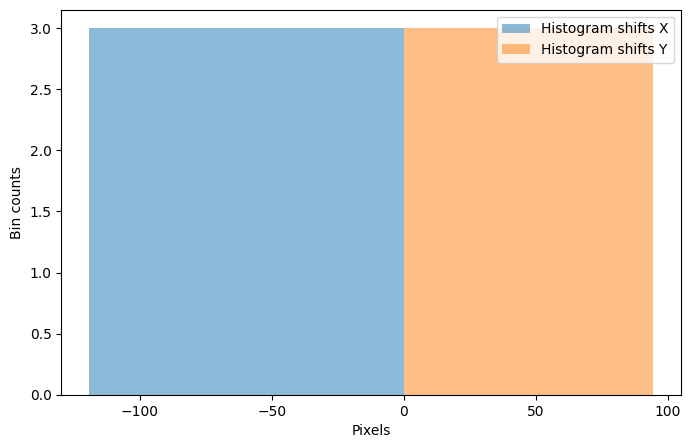

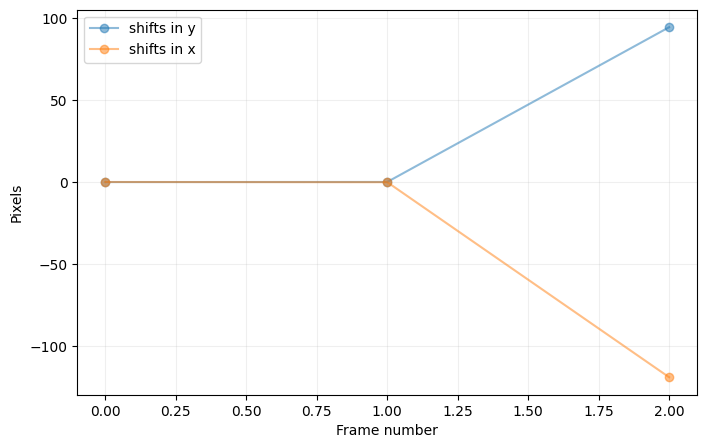

In [85]:
cube_adi, empty_adi, psf_norm = get_clean_cube(
                                  data_folder='./data/f_dhtau/',
                                  params_table=table)

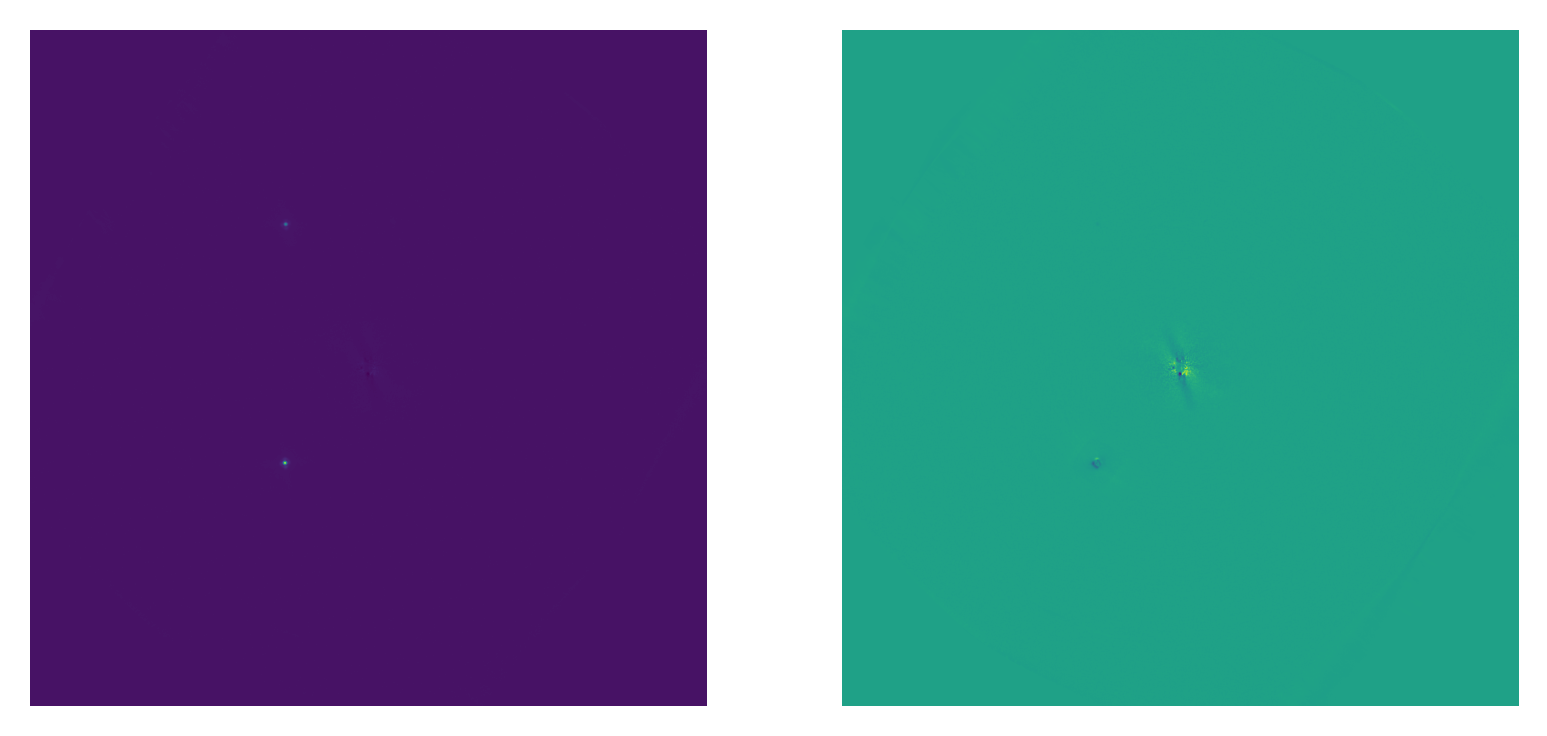

In [86]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, dpi=300)

axes[0].imshow(cube_adi, origin='lower') 
               #,vmin=cube_adi.min(), vmax=cube_adi.max())
axes[0].axis('off')
axes[1].imshow(empty_adi, origin='lower') 
               #,vmin=cube_adi.min(), vmax=cube_adi.max())
axes[1].axis('off')
plt.show()

In [99]:
x_fake_comp, y_fake_comp, flux_fake_comp = get_fakecomp_to_inject(
                             residuals_frame=empty_adi, 
                             params_table=table,
                             offset=9)

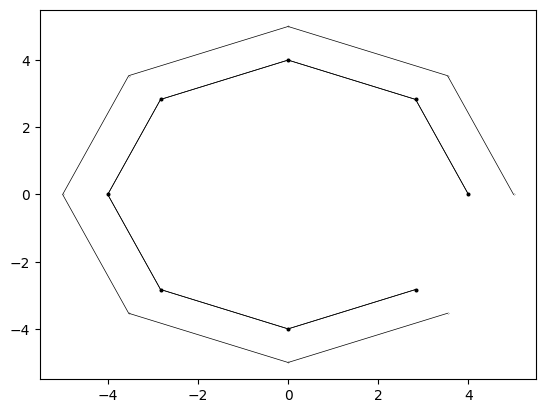

In [113]:
for i in range(len(flux_fake_comp)):
    plt.plot(x_fake_comp[i], y_fake_comp[i], marker='o', markersize=flux_fake_comp[i][0], linewidth=0.5, color='k')

In [62]:
aper = CircularAperture((single_npsf[0].shape[0]//2, single_npsf[0].shape[0]//2), 
                        r=mean_fwhm_fit/2.) 
starphot_estimated = aperture_photometry(single_npsf, aper, method='exact')
starphot_estimated = starphot_estimated['aperture_sum'][0]

In [ ]:
cc_1 = contrast_curve(cube, 
                      rot_angles, 
                      psf_norm, 
                      fwhm=row['fwhm_mean'], 
                      pxscale=0.01225, 
                      starphot=starphot_estimated,
                      sigma=5, 
                      nbranch=1, 
                      algo=pca_annular,
                      radius_int=int(row['fwhm_mean']),
                      ncomp=9, 
                      debug=True)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-08-01 16:27:26
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
ALGO : pca_annular, FWHM = 4.261339461993815, # BRANCHES = 1, SIGMA = 5, STARPHOT = 0.9999999207732931
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
